In [100]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense


In [101]:
#importing th dataset as trainin data and testing data
train_data=r"C:\Users\HP1\archive_catdog\dog vs cat\dataset\training_set"
test_data=r"C:\Users\HP1\archive_catdog\dog vs cat\dataset\test_set"

In [103]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [104]:
training_data=train_datagen.flow_from_directory(train_data,
                                                target_size=(64,64),
                                                batch_size=32,
                                                class_mode="binary")
test_set=test_datagen.flow_from_directory(test_data,
                                                target_size=(64,64),
                                                batch_size=32,
                                                class_mode="binary")


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [106]:
#Building a model
model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation="relu"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation="relu"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),input_shape=(64,64,3),activation="relu"))
model.add(MaxPooling2D((2,2)))


model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(1,activation="sigmoid"))           



In [107]:
#Add loss funcn and optimizers 
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [108]:
#Fitting the model 
history=model.fit(training_data,epochs=15,validation_data=test_set)

Epoch 1/15
250/250 [==============================] - 51s 198ms/step - loss: 0.6553 - accuracy: 0.6041 - val_loss: 0.5862 - val_accuracy: 0.6935
Epoch 2/15
250/250 [==============================] - 47s 187ms/step - loss: 0.6037 - accuracy: 0.6687 - val_loss: 0.5734 - val_accuracy: 0.6980
Epoch 3/15
250/250 [==============================] - 47s 188ms/step - loss: 0.5598 - accuracy: 0.7160 - val_loss: 0.5331 - val_accuracy: 0.7350
Epoch 4/15
250/250 [==============================] - 47s 187ms/step - loss: 0.5216 - accuracy: 0.7398 - val_loss: 0.4975 - val_accuracy: 0.7585
Epoch 5/15
250/250 [==============================] - 47s 186ms/step - loss: 0.4996 - accuracy: 0.7545 - val_loss: 0.4737 - val_accuracy: 0.7855
Epoch 6/15
250/250 [==============================] - 47s 188ms/step - loss: 0.4858 - accuracy: 0.7614 - val_loss: 0.4624 - val_accuracy: 0.7740
Epoch 7/15
250/250 [==============================] - 48s 192ms/step - loss: 0.4620 - accuracy: 0.7780 - val_loss: 0.4434 - val_ac

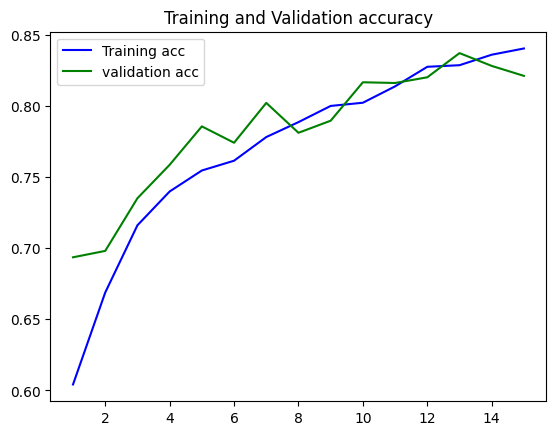

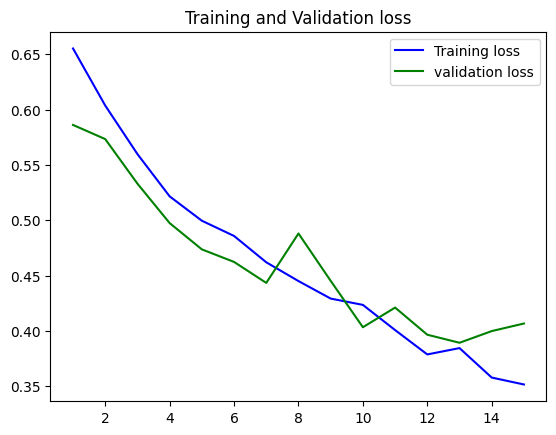

In [109]:
#Plotting the graph for Training-validation accuracy and Training-validation loss
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
loss=history.history["loss"]
val_loss=history.history["val_loss"]
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,"b",label="Training acc")
plt.plot(epochs,val_acc,"g",label="validation acc")
plt.title("Training and Validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs,loss,"b",label="Training loss")
plt.plot(epochs,val_loss,"g",label="validation loss")
plt.title("Training and Validation loss")
plt.legend()
plt.show()

In [116]:
#finding out the class labels
training_data.class_indices

{'cats': 0, 'dogs': 1}

In [117]:
#Testing the model on new images 
import cv2
test_img=cv2.imread(r"C:\Users\HP1\Downloads\photo.png")
test_img=cv2.resize(test_img,(64,64))
test_input=test_img.reshape((1,64,64,3))
prediction=model.predict(test_input)
print("Prediction:", prediction)


1/1 [==============================] - 0s 42ms/step
Prediction: [[0.]]


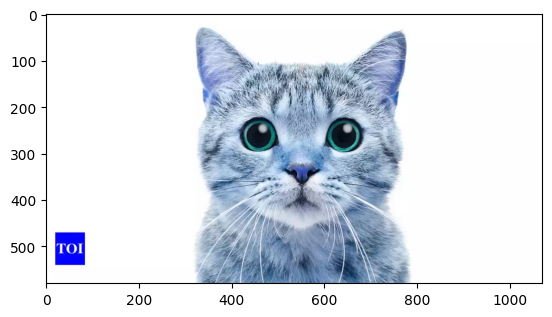

In [118]:
#lets verify with the original image
test_img=cv2.imread(r"C:\Users\HP1\Downloads\photo.png")
plt.imshow(test_img)

In [125]:
test_img2=cv2.imread(r"C:\Users\HP1\Downloads\photo1.png")
test_img2=cv2.resize(test_img2,(64,64))
test_input2=test_img2.reshape((1,64,64,3))
prediction=model.predict(test_input2)
print("Prediction:", prediction)



1/1 [==============================] - 0s 41ms/step
Prediction: [[1.]]


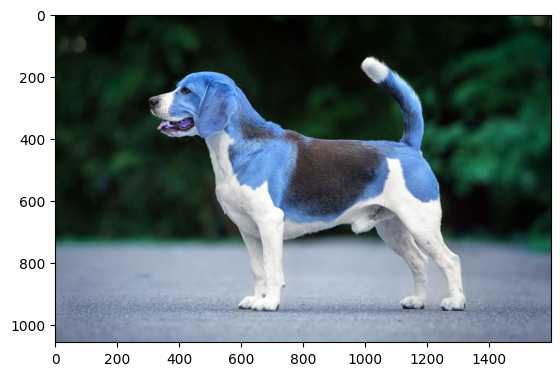

In [126]:
#lets verify with the original image
test_img2=cv2.imread(r"C:\Users\HP1\Downloads\photo1.png")
plt.imshow(test_img2)
